In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt

In [4]:
df = pd.read_csv('./combined_data_clean.csv')

In [5]:
betting_keywords = ['B365', 'BW', 'PS', 'WH', 'Max', 'Avg', 'VC', 'IW', 'AH']

df = df.drop(
    columns=[c for c in df.columns if any(k in c for k in betting_keywords)]
)

df.columns

Index(['FTHG', 'FTAG', 'FTR', 'HTHG', 'HTAG', 'HST', 'AST'], dtype='object')

In [6]:

rename_map = {
    'FTHG': 'Full Time Home Goals',
    'FTAG': 'Full Time Away Goals',
    'FTR' : 'Full Time Result',
    'HTHG': 'Half Time Home Goals',
    'HTAG': 'Half Time Away Goals',
    'HST' : 'Home Shots on Target',
    'AST' : 'Away Shots on Target'
}
df = df.rename(columns=rename_map)
df.columns

Index(['Full Time Home Goals', 'Full Time Away Goals', 'Full Time Result',
       'Half Time Home Goals', 'Half Time Away Goals', 'Home Shots on Target',
       'Away Shots on Target'],
      dtype='object')

In [7]:
from sklearn.preprocessing import LabelEncoder

X = df[
    [
        'Half Time Home Goals',
        'Half Time Away Goals',
        'Home Shots on Target',
        'Away Shots on Target'
    ]
]

y = df['Full Time Result']

encoder = LabelEncoder()
y = encoder.fit_transform(y)

In [8]:
Xtrain, Xval, Ytrain, Yval = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

In [9]:
Xtrain.head()

,Half Time Home Goals,Half Time Away Goals,Home Shots on Target,Away Shots on Target
1088,-0.787181,0.715283,2.140331,-0.764263
1204,0.410169,-0.691476,0.139446,-0.299702
1220,0.410169,0.715283,0.939800,0.629421
1998,0.410169,-0.691476,-1.061085,0.164860
2096,1.607519,-0.691476,0.539623,-0.764263


In [10]:
Ytrain[:5]

array([0, 2, 2, 1, 2], dtype=int64)

In [11]:
DTC = DecisionTreeClassifier(criterion="entropy", max_depth=7, random_state=42)
DTC.fit(Xtrain, Ytrain)

,criterion,'entropy'
,splitter,'best'
,max_depth,7
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,None
,random_state,42
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,class_weight,None


              precision    recall  f1-score   support

           0       0.63      0.67      0.65       221
           1       0.41      0.33      0.36       205
           2       0.70      0.76      0.73       347

    accuracy                           0.62       773
   macro avg       0.58      0.58      0.58       773
weighted avg       0.60      0.62      0.61       773



Text(50.722222222222214, 0.5, 'Actual')

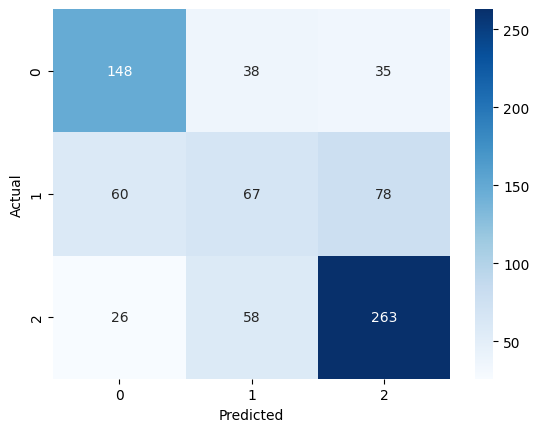

In [12]:
y_test_predict = DTC.predict(Xval)
print(classification_report(Yval, y_test_predict))

# Confusion Matrix to see where the model is getting confused
cm = confusion_matrix(Yval, y_test_predict)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')

In [13]:
import graphviz
from sklearn import tree
dot_data=tree.export_graphviz(DTC)
graph = graphviz.Source(dot_data, format="png")
graph

ExecutableNotFound: failed to execute WindowsPath('dot'), make sure the Graphviz executables are on your systems' PATH

In [14]:
features = X.columns
dot_data = tree.export_graphviz(
    DTC,
    out_file=None,
    feature_names=features,           # Shows 'HST' instead of 'x[2]'
    class_names=['Away Win', 'Draw', 'Home Win'], # Adjust based on your FTR encoding
    filled=True,
    rounded=True
)
graph = graphviz.Source(dot_data)
graph

ExecutableNotFound: failed to execute WindowsPath('dot'), make sure the Graphviz executables are on your systems' PATH

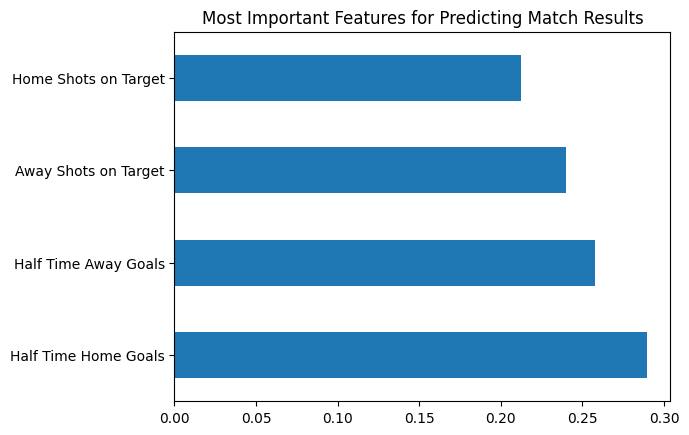

In [15]:
importances = DTC.feature_importances_
feat_importances = pd.Series(importances, index=features)
feat_importances.nlargest(6).plot(kind='barh')
plt.title("Most Important Features for Predicting Match Results")
plt.show()

In [16]:
y_train_predict = DTC.predict(Xtrain)
y_test_predict = DTC.predict(Xval)

train_acc = accuracy_score(Ytrain, y_train_predict)
test_acc = accuracy_score(Yval, y_test_predict)

print(f"\nTraining Accuracy: {train_acc:.4f}")
print(f"Test Accuracy: {test_acc:.4f}")


Training Accuracy: 0.6599
Test Accuracy: 0.6184


In [17]:
if train_acc > test_acc + 0.1:
    print("Comment: The model might be slightly overfitting as training accuracy is significantly higher.")
else:
    print("Comment: The model generalizes well as train and test accuracies are close.")

Comment: The model generalizes well as train and test accuracies are close.


In [18]:
import joblib

# Save the trained model to a file
joblib.dump(DTC, 'DecisionTree.pkl')
print("Model saved as 'DecisionTree.pkl'")

Model saved as 'DecisionTree.pkl'
